# TASK B: GSE65688 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [5]:
file_path = "Data/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt"
df = pd.DataFrame()

df = pd.read_csv(file_path, sep='\t', header=0, index_col=0)
df = df.transpose()

# Remove "gene_name" and "gene_type" rows
df = df.drop(["gene_name", "gene_type"])

In [6]:
df

gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.0,46.3,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.0,0.0,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.0,5.72,10.0,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [7]:
# Load series matrix from CSV file
df_series = pd.DataFrame()
df_series = pd.read_excel("/content/Series_Matrix.xlsx")
# Show count of labels
df_series.value_counts()



GSE75688
2           453
1           110
dtype: int64

In [8]:
# Show count of labels as percentage
df_series.value_counts(normalize = True)*100

GSE75688
2           80.461812
1           19.538188
dtype: float64

In [9]:
# Add new column to df
df['Series Matrix'] = df_series.values
df

gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3,Series Matrix
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0,2
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0,2
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.0,46.3,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0,2
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.0,0.0,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0,2
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.0,5.72,10.0,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0,2
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0,2
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0,2
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0,2


In [14]:
# Exclude the first row and feature all columns except the first and last
X = df.iloc[1:, 1:-1].values 
# Target variable = last column (labels)
y = df.iloc[1:, -1].values  

In [ ]:
# Replace NaN values with mean of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Encode the classes as 0 and 1
class_mapping = {1: 0, 2: 1}  # Map 1 to 0 and 2 to 1
y_encoded = np.array([class_mapping[label] for label in y])

# Split the encoded target variable into training and testing sets
y_train_encoded = np.array([class_mapping[label] for label in y_train])
y_test_encoded = np.array([class_mapping[label] for label in y_test])


Training set shape: (449, 57914) (449,)
Testing set shape: (113, 57914) (113,)


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)

# XGBoost
xgb = XGBClassifier(n_estimators=100)

# CatBoost
catboost = CatBoostClassifier(n_estimators=100)

# Bagging
bagging = BaggingClassifier(n_estimators=100)

In [ ]:
# Define the ensemble techniques and their names
ensemble_models = [rf, xgb, catboost, bagging]
model_names = ['Random Forest', 'XGBoost', 'CatBoost', 'Bagging']

# Create lists to store the performance metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate the performance metrics for each model
for model in ensemble_models:
    # Fit the model on the training data
    model.fit(X_train, y_train_encoded)
    
    # Predict the labels for the test data
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    
    # Append the scores to the correct list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

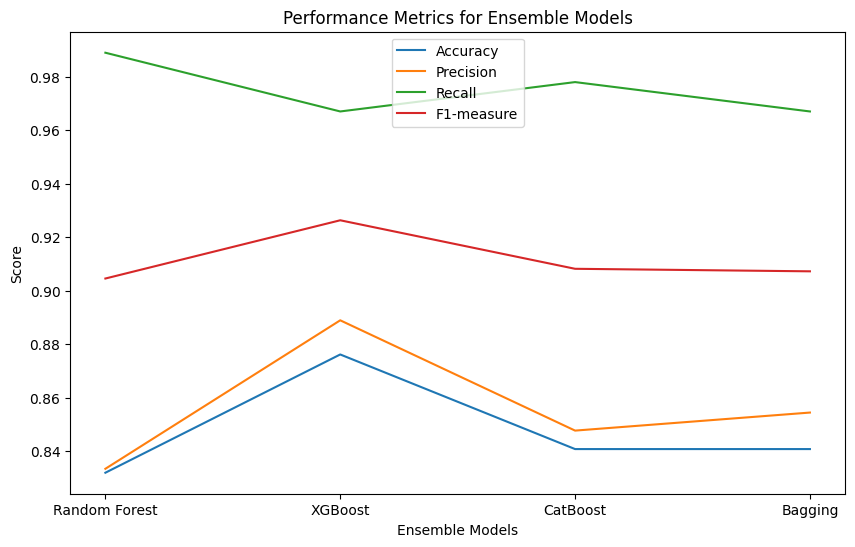

In [22]:
# Plot the performance metrics for each model
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, label='Accuracy')
plt.plot(model_names, precision_scores, label='Precision')
plt.plot(model_names, recall_scores, label='Recall')
plt.plot(model_names, f1_scores, label='F1-measure')
plt.xlabel('Ensemble Models')
plt.ylabel('Score')
plt.title('Performance Metrics for Ensemble Models')
plt.legend()
plt.show()

In [23]:
# Print the metric values
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-measure: {f1}")
    print()

Model: Random Forest
Accuracy: 0.831858407079646
Precision: 0.8333333333333334
Recall: 0.989010989010989
F1-measure: 0.9045226130653267

Model: XGBoost
Accuracy: 0.8761061946902655
Precision: 0.8888888888888888
Recall: 0.967032967032967
F1-measure: 0.9263157894736841

Model: CatBoost
Accuracy: 0.8407079646017699
Precision: 0.8476190476190476
Recall: 0.978021978021978
F1-measure: 0.9081632653061225

Model: Bagging
Accuracy: 0.8407079646017699
Precision: 0.8543689320388349
Recall: 0.967032967032967
F1-measure: 0.9072164948453608

